<a href="https://colab.research.google.com/github/riarahmasp/A_Study-Case_3/blob/main/Case_Study_03_Data_Mining_Association_Rule_(Market_Basket_Analysis)_Ganjil_2022_Kelompok_A.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**KELOMPOK A DATA MINING B**
1. Aldinda Albanna (2006533295)
2. Chrisogonus James Ang (2006572932)
3. Evan Haryowidyatna (2006485011)
4. Nadhila Nur Qamarina (2006521742)
5. Nerissa Netanaya (1906375801)
6. Ria Rahma Septiani (2006536246)
7. Yemima Kathleen Monica (2006528982)
8. Yovela Natalia Yvone (2006463894)

**PENDAHULUAN**

Pandemi COVID-19 telah menyebabkan menurunnya perekonomian dan aktivitas di berbagai sektor dan wilayah di Indonesia. Pasca masa pandemi, banyak usaha yang mengalami penurunan laba yang signifikan, termasuk Toko AlfaIndo cabang UI Depok. AlfaIndo adalah sebuah toko waralaba yang memiliki beberapa cabang di kota-kota besar di Indonesia seperti Jakarta, Depok, Surabaya, dan Medan. Oleh karena itu, diperlukan upaya untuk meningkatkan kembali penjualan Toko AlfaIndo cabang UI Depok.

**TUJUAN**
* Mengetahui hubungan antar produk.
* Mengetahui perilaku konsumen dalam membeli produk di Toko Indoalfa.
* Memberikan rekomendasi mengenai tata susun produk di Toko Indoalfa agar memudahkan pembeli dalam membeli barang-barang yang biasanya dibeli secara bersamaan.
* Memberikan rekomendasi promo terhadap barang tertentu berdasarkan kebiasaan pembeli agar meningkatkan jumlah penjualan.

In [ ]:
#Mengimport modul yang akan digunakan
!pip install apyori
!pip install mlxtend  
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from apyori import apriori
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules
#pip install apyori
import datetime

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


##**Pre-Processing**

Sebelum data digunakan, ID Transaksi, Tanggal, dan Konsumen pada tiap pembelian sudah dilengkapi dengan menggunakan Microsoft Excel.

In [ ]:
url = 'https://raw.githubusercontent.com/YovelaYvone/MBA/main/datastudycase21okt.csv'
df = pd.read_csv(url,sep=';')
df

,ID Transaksi,Tanggal,Konsumen,ID Produk,Nama Produk,Merek,Jumlah
0,1,01/07/22 00.00,Mr. A,1,Roti,Sri Roti,2
1,1,01/07/22 00.00,Mr. A,2,Air Minum,Aquos,1
2,1,01/07/22 00.00,Mr. A,11,Mie Instan,Indomi,2
3,1,01/07/22 00.00,Mr. A,12,Mie Instan,Mi Sedap,1
4,2,01/07/22 00.00,Mr. B,2,Air Minum,Aquos,1
5,2,01/07/22 00.00,Mr. B,6,Snack,Chiki,2
6,2,01/07/22 00.00,Mr. B,3,Roti,Prambanan,1
7,2,01/07/22 00.00,Mr. B,5,Shampoo,Clean,1
8,3,02/07/22 00.00,Mr. C,4,Sabun,Lifboy,1
9,3,02/07/22 00.00,Mr. C,5,Shampoo,Clean,1


In [ ]:
df.dtypes

ID Transaksi     int64
Tanggal         object
Konsumen        object
ID Produk        int64
Nama Produk     object
Merek           object
Jumlah           int64
dtype: object

In [ ]:
df['Tanggal'] = pd.to_datetime(df['Tanggal'],format='%d/%m/%y %H.%M')

In [ ]:
df.dtypes

ID Transaksi             int64
Tanggal         datetime64[ns]
Konsumen                object
ID Produk                int64
Nama Produk           category
Merek                 category
Jumlah                   int64
dtype: object

In [ ]:
df['Nama Produk'] = df['Nama Produk'].str.strip() 
df['Merek'] = df['Merek'].str.strip() 
df.dropna(axis=0, subset=['ID Transaksi'], inplace=True)
df['Tanggal']= pd.to_datetime(df['Tanggal'])
df['ID Transaksi']= df['ID Transaksi'].astype('int')
df['Merek']= df['Merek'].astype('category')
df['Nama Produk']= df['Nama Produk'].astype('category')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 56 entries, 0 to 55
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   ID Transaksi  56 non-null     int64         
 1   Tanggal       56 non-null     datetime64[ns]
 2   Konsumen      56 non-null     object        
 3   ID Produk     56 non-null     int64         
 4   Nama Produk   56 non-null     category      
 5   Merek         56 non-null     category      
 6   Jumlah        56 non-null     int64         
dtypes: category(2), datetime64[ns](1), int64(3), object(1)
memory usage: 3.5+ KB


In [ ]:
df.head()

,ID Transaksi,Tanggal,Konsumen,ID Produk,Nama Produk,Merek,Jumlah
0,1,2022-07-01,Mr. A,1,Roti,Sri Roti,2
1,1,2022-07-01,Mr. A,2,Air Minum,Aquos,1
2,1,2022-07-01,Mr. A,11,Mie Instan,Indomi,2
3,1,2022-07-01,Mr. A,12,Mie Instan,Mi Sedap,1
4,2,2022-07-01,Mr. B,2,Air Minum,Aquos,1


##**EDA**

In [ ]:
df2 = df.groupby('ID Produk')['Jumlah'].sum()
df2

ID Produk
1     11
2      6
3      4
4      6
5      7
6     11
7      4
8      5
9      5
10    10
11    10
12     5
Name: Jumlah, dtype: int64

In [ ]:
data = [['Roti Prambanan', 4],['Roti Sri Roti', 11], ['Air Minum Aquos', 6],['Air Minum Sprit', 10], ['Sabun Luks', 4],  ['Sabun Lifboy', 6]
        , ['Shampoo Clean', 7],['Snack Citata', 5], ['Snack Chiki', 11], ['Rokok Malioboro', 5],   ['Mie Instan Mi Sedap', 5],['Mie Instan Indomi', 10],]
  
# Create the pandas DataFrame
_df2= pd.DataFrame(data, columns=['NamaProduk', 'Jumlah'])
_df2

,NamaProduk,Jumlah
0,Roti Prambanan,4
1,Roti Sri Roti,11
2,Air Minum Aquos,6
3,Air Minum Sprit,10
4,Sabun Luks,4
5,Sabun Lifboy,6
6,Shampoo Clean,7
7,Snack Citata,5
8,Snack Chiki,11
9,Rokok Malioboro,5


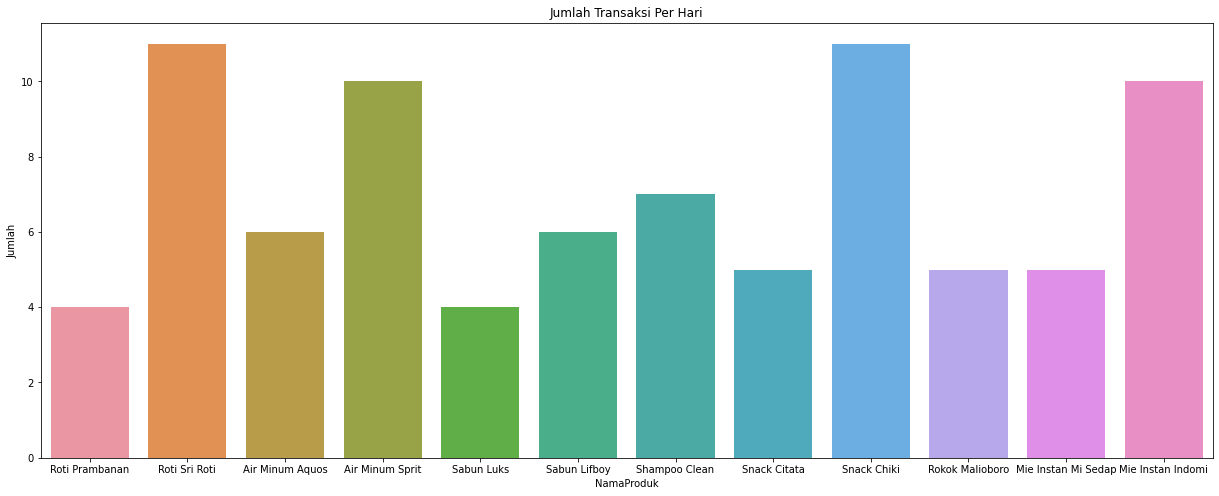

In [ ]:
plt.figure(figsize=(21,8))
ax = sns.barplot(data=_df2, x="NamaProduk", y="Jumlah").set(title="Jumlah Transaksi Per Hari")

Dari grafik, didapati perbedaan yang cukup jauh pada item terjual pada produk Roti (yang paling laku adalah merek Sri Roti), Air Minum (yang paling laku adalah merek Sprit), Snack (yang paling laku adalah merek Chiki), dan Mie Instan (yang paling laku adalah merek Indomi). Hal tersebut dapat terjadi karena banyak hal seperti faktor rasa, keterkenalan merek, hingga preferensi konsumen. Untuk menarikan penjualan-penjulan merek lainnya, dapat dibuat promo yang menggabungkan merek yang kurang laku. Misalnya dengan pembelian Roti Prambanan dapat gratis Air Minum Aquos, pembelian Snack Citata dan Air Minum Aquos akan mendapat harga khusus, dan lainnya.

In [ ]:
_df3 = df.groupby('Tanggal')['Jumlah'].sum()
_df3

Tanggal
2022-07-01    11
2022-07-02    13
2022-07-03     7
2022-07-04     8
2022-07-05    14
2022-07-06     9
2022-07-07     9
2022-07-08     1
2022-08-02     2
2022-09-05     6
2022-10-02     4
Name: Jumlah, dtype: int64

In [ ]:
data = [['2022-07-01', 11], ['2022-07-02 ', 13], ['2022-07-03', 7], ['2022-07-04', 8]
        , ['2022-07-05', 14], ['2022-07-06', 9], ['2022-07-07', 9], ['2022-07-08', 1]
        , ['2022-08-02', 2], ['2022-09-05', 6], ['2022-10-02', 4]]
_df3_= pd.DataFrame(data, columns=['Tanggal', 'Jumlah'])
_df3_['Tanggal'] = pd.to_datetime(_df3_['Tanggal'])
_df3_.dtypes

Tanggal    datetime64[ns]
Jumlah              int64
dtype: object

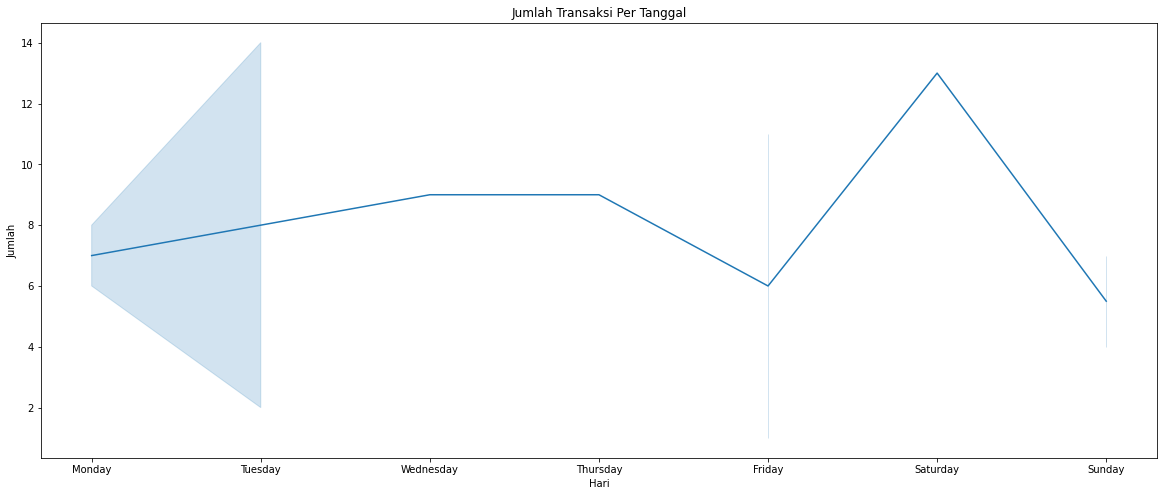

In [ ]:
plt.figure(figsize=(20,8))
_df3_['Hari'] = _df3_['Tanggal'].dt.day_name()
_df3_['Hari'] = pd.Categorical(_df3_['Hari'],
                                   categories=['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'],
                                   ordered=True)
ax = sns.lineplot(data=_df3_, x="Hari", y="Jumlah").set(title="Jumlah Transaksi Per Tanggal")

Pada hari Sabtu, penjualan produk paling tinggi dan Jumat, Minggu penjualan produk tergolong rendah. Sedangkan, pada hari lain tergolong konstan. 

Pada Senin sampai Kamis, saran yang dapat kami berikan terdapat di bagian bawah berikut. Sedangkan, untuk hari Jumat sampai Minggu, dapat diadakan banyak promo agar grafik penjualan terus meningkat. 

#Berdasarkan nama produk

In [ ]:
basket = df.groupby(['ID Transaksi','Nama Produk'])['Jumlah'].sum().unstack().reset_index().fillna(0).set_index('ID Transaksi')
basket

Nama Produk,Air Minum,Mie Instan,Rokok,Roti,Sabun,Shampoo,Snack
ID Transaksi,,,,,,,
1,1,3,0,2,0,0,0
2,1,0,0,1,0,1,2
3,0,0,1,0,1,1,0
4,2,2,0,2,1,0,3
5,2,0,0,0,0,0,1
6,0,2,0,0,1,1,0
7,1,0,1,0,0,0,0
8,0,3,0,0,1,1,1
9,1,2,1,2,1,0,2


In [ ]:
def encode_units(x):
  if x <= 0:
    return 0
  elif x >=1:
    return 1

basket_sets = basket.applymap(encode_units)
basket_sets

Nama Produk,Air Minum,Mie Instan,Rokok,Roti,Sabun,Shampoo,Snack
ID Transaksi,,,,,,,
1,1,1,0,1,0,0,0
2,1,0,0,1,0,1,1
3,0,0,1,0,1,1,0
4,1,1,0,1,1,0,1
5,1,0,0,0,0,0,1
6,0,1,0,0,1,1,0
7,1,0,1,0,0,0,0
8,0,1,0,0,1,1,1
9,1,1,1,1,1,0,1


In [ ]:
frequent_itemsets = apriori(basket_sets, min_support=0.1, use_colnames=True)
frequent_itemsets

,support,itemsets
0,0.611111,(Air Minum)
1,0.333333,(Mie Instan)
2,0.277778,(Rokok)
3,0.500000,(Roti)
4,0.444444,(Sabun)
5,0.333333,(Shampoo)
6,0.500000,(Snack)
7,0.166667,"(Mie Instan, Air Minum)"
8,0.111111,"(Rokok, Air Minum)"
9,0.444444,"(Air Minum, Roti)"


Support adalah probabilitas A dan B muncul bersamaan. Jika dilihat dari nilai support tersebut, kombinasi antara rokok dengan produk lain dan rokok itu sendiri bernilai kecil. Artinya, rokok jarang dibeli, baik jika dibeli sendiri, maupun bersama dengan produk lain. Oleh karena itu, kami menyarankan bahwa produk rokok diberikan promo setiap pembelian dengan air minum, snack, roti karena pada umumnya orang akan merokok ditemani dengan air minum atau roti ataupun snack.

Lalu, cara lain untuk meningkatkan pembelian rokok adalah dengan memberikan harga spesial ketika pembelian di atas Rp50.000 di mana pembelian tersebut mencakup barang apa saja.

Alasan pemberian saran tersebut karena setiap terdapat produk rokok dalam suatu kombinasi, nilai supportnya kecil.

In [ ]:
rules1 = association_rules(frequent_itemsets, metric="lift", min_threshold=1)
rules1.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Air Minum),(Roti),0.611111,0.500000,0.444444,0.727273,1.454545,0.138889,1.833333
1,(Roti),(Air Minum),0.500000,0.611111,0.444444,0.888889,1.454545,0.138889,3.500000
2,(Air Minum),(Snack),0.611111,0.500000,0.388889,0.636364,1.272727,0.083333,1.375000
3,(Snack),(Air Minum),0.500000,0.611111,0.388889,0.777778,1.272727,0.083333,1.750000
4,(Mie Instan),(Roti),0.333333,0.500000,0.166667,0.500000,1.000000,0.000000,1.000000


In [ ]:
result1 = rules1[(rules1['lift'] >= 1) & 
               (rules1['confidence'] >= 0.8)]

apr_result = result1.sort_values(by='lift', ascending=False)
apr_result.head(20)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
159,"(Mie Instan, Snack, Roti)","(Sabun, Air Minum)",0.111111,0.166667,0.111111,1.0,6.000000,0.092593,inf
156,"(Mie Instan, Air Minum, Snack)","(Sabun, Roti)",0.111111,0.166667,0.111111,1.0,6.000000,0.092593,inf
155,"(Sabun, Mie Instan, Air Minum)","(Snack, Roti)",0.111111,0.333333,0.111111,1.0,3.000000,0.074074,inf
122,"(Sabun, Air Minum)","(Snack, Roti)",0.166667,0.333333,0.166667,1.0,3.000000,0.111111,inf
158,"(Sabun, Mie Instan, Roti)","(Air Minum, Snack)",0.111111,0.388889,0.111111,1.0,2.571429,0.067901,inf
124,"(Sabun, Roti)","(Air Minum, Snack)",0.166667,0.388889,0.166667,1.0,2.571429,0.101852,inf
107,"(Mie Instan, Air Minum, Snack)",(Sabun),0.111111,0.444444,0.111111,1.0,2.250000,0.061728,inf
148,"(Mie Instan, Air Minum, Snack, Roti)",(Sabun),0.111111,0.444444,0.111111,1.0,2.250000,0.061728,inf
135,"(Mie Instan, Snack, Roti)",(Sabun),0.111111,0.444444,0.111111,1.0,2.250000,0.061728,inf
58,"(Shampoo, Mie Instan)",(Sabun),0.166667,0.444444,0.166667,1.0,2.250000,0.092593,inf


In [ ]:
apr_result = result1.sort_values(by='lift', ascending=True)
apr_result.head(20)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
1,(Roti),(Air Minum),0.500000,0.611111,0.444444,0.888889,1.454545,0.138889,3.500000
150,"(Sabun, Mie Instan, Snack, Roti)",(Air Minum),0.111111,0.611111,0.111111,1.000000,1.636364,0.043210,inf
120,"(Sabun, Snack, Roti)",(Air Minum),0.166667,0.611111,0.166667,1.000000,1.636364,0.064815,inf
79,"(Sabun, Mie Instan, Roti)",(Air Minum),0.111111,0.611111,0.111111,1.000000,1.636364,0.043210,inf
40,"(Snack, Roti)",(Air Minum),0.333333,0.611111,0.333333,1.000000,1.636364,0.129630,inf
35,"(Sabun, Roti)",(Air Minum),0.166667,0.611111,0.166667,1.000000,1.636364,0.064815,inf
92,"(Mie Instan, Snack, Roti)",(Air Minum),0.111111,0.611111,0.111111,1.000000,1.636364,0.043210,inf
21,"(Mie Instan, Roti)",(Air Minum),0.166667,0.611111,0.166667,1.000000,1.636364,0.064815,inf
38,"(Air Minum, Snack)",(Roti),0.388889,0.500000,0.333333,0.857143,1.714286,0.138889,3.500000
7,(Mie Instan),(Sabun),0.333333,0.444444,0.277778,0.833333,1.875000,0.129630,3.333333


Berdasarkan nama produk, konsumen yang membeli mie instan, snack, dan roti cenderung membeli sabun dan air minum. Lalu, jika dilihat dari nilai lift, sebaiknya produk roti, snack, mie instan, sabun, dan air minum sebaiknya diletakkan berjauhan karena sepuluh kombinasi teratas dengan lift tertinggi terdapat produk-produk tersebut. Sehingga, jika diletakkan saling berjauhan, pelanggan akan memutarkan toko. Sedangkan, untuk produk selain roti, snack, mie instan, sabun, dan air minum diletakkan berdekatan dengan produk yang telah disebutkan.

#Berdasarkan merek


In [ ]:
merek = df.groupby(['ID Transaksi','Merek'])['Jumlah'].sum().unstack().reset_index().fillna(0).set_index('ID Transaksi')
merek

Merek,Aquos,Chiki,Citata,Clean,Indomi,Lifboy,Luks,Malioboro,Mi Sedap,Prambanan,Sprit,Sri Roti
ID Transaksi,,,,,,,,,,,,
1,1,0,0,0,2,0,0,0,1,0,0,2
2,1,2,0,1,0,0,0,0,0,1,0,0
3,0,0,0,1,0,1,0,1,0,0,0,0
4,0,0,3,0,0,0,1,0,2,0,2,2
5,0,1,0,0,0,0,0,0,0,0,2,0
6,0,0,0,1,2,1,0,0,0,0,0,0
7,0,0,0,0,0,0,0,1,0,0,1,0
8,0,1,0,1,3,0,1,0,0,0,0,0
9,1,2,0,0,2,1,0,1,0,0,0,2


In [ ]:
def encode_units(x):
  if x <= 0:
    return 0
  elif x >=1:
    return 1

merek_sets = merek.applymap(encode_units)
merek_sets

Merek,Aquos,Chiki,Citata,Clean,Indomi,Lifboy,Luks,Malioboro,Mi Sedap,Prambanan,Sprit,Sri Roti
ID Transaksi,,,,,,,,,,,,
1,1,0,0,0,1,0,0,0,1,0,0,1
2,1,1,0,1,0,0,0,0,0,1,0,0
3,0,0,0,1,0,1,0,1,0,0,0,0
4,0,0,1,0,0,0,1,0,1,0,1,1
5,0,1,0,0,0,0,0,0,0,0,1,0
6,0,0,0,1,1,1,0,0,0,0,0,0
7,0,0,0,0,0,0,0,1,0,0,1,0
8,0,1,0,1,1,0,1,0,0,0,0,0
9,1,1,0,0,1,1,0,1,0,0,0,1


In [ ]:
frequent_itemsetsmerek = apriori(merek_sets, min_support=0.1, use_colnames=True)
frequent_itemsetsmerek

,support,itemsets
0,0.277778,(Aquos)
1,0.388889,(Chiki)
2,0.111111,(Citata)
3,0.333333,(Clean)
4,0.277778,(Indomi)
5,0.277778,(Lifboy)
6,0.166667,(Luks)
7,0.277778,(Malioboro)
8,0.166667,(Mi Sedap)
9,0.166667,(Prambanan)


Support adalah probabilitas A dan B muncul bersamaan. Jika dilihat dari nilai support tersebut, untuk snacks Citata, sabun luks, shampoo clean, mi sedap bernilai kecil. Artinya, pembeliannya terhitung sedikit.

In [ ]:
rules2 = association_rules(frequent_itemsetsmerek, metric="lift", min_threshold=1)
rules2.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Aquos),(Chiki),0.277778,0.388889,0.166667,0.600000,1.542857,0.058642,1.527778
1,(Chiki),(Aquos),0.388889,0.277778,0.166667,0.428571,1.542857,0.058642,1.263889
2,(Aquos),(Indomi),0.277778,0.277778,0.111111,0.400000,1.440000,0.033951,1.203704
3,(Indomi),(Aquos),0.277778,0.277778,0.111111,0.400000,1.440000,0.033951,1.203704
4,(Lifboy),(Aquos),0.277778,0.277778,0.111111,0.400000,1.440000,0.033951,1.203704


In [ ]:
result2 = rules2[(rules2['lift'] >= 1) & 
               (rules2['confidence'] >= 0.8)]

apr_result = result2.sort_values(by='lift', ascending=False)
apr_result.head(20)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
97,"(Lifboy, Aquos)","(Sri Roti, Chiki)",0.111111,0.111111,0.111111,1.0,9.0,0.098765,inf
96,"(Sri Roti, Chiki)","(Lifboy, Aquos)",0.111111,0.111111,0.111111,1.0,9.0,0.098765,inf
98,"(Lifboy, Chiki)","(Aquos, Sri Roti)",0.111111,0.166667,0.111111,1.0,6.0,0.092593,inf
94,"(Lifboy, Sri Roti)","(Aquos, Chiki)",0.111111,0.166667,0.111111,1.0,6.0,0.092593,inf
81,(Citata),"(Sprit, Sri Roti)",0.111111,0.166667,0.111111,1.0,6.0,0.092593,inf
43,"(Lifboy, Chiki)",(Aquos),0.111111,0.277778,0.111111,1.0,3.6,0.080247,inf
49,"(Sri Roti, Chiki)",(Aquos),0.111111,0.277778,0.111111,1.0,3.6,0.080247,inf
56,"(Sri Roti, Indomi)",(Aquos),0.111111,0.277778,0.111111,1.0,3.6,0.080247,inf
61,"(Lifboy, Sri Roti)",(Aquos),0.111111,0.277778,0.111111,1.0,3.6,0.080247,inf
92,"(Aquos, Sri Roti, Chiki)",(Lifboy),0.111111,0.277778,0.111111,1.0,3.6,0.080247,inf


In [ ]:
result2 = rules2[(rules2['lift'] >= 1) & 
               (rules2['confidence'] >= 0.8)]

apr_result = result2.sort_values(by='antecedent support', ascending= True)
apr_result.head(20)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
18,(Citata),(Sprit),0.111111,0.333333,0.111111,1.0,3.000000,0.074074,inf
96,"(Sri Roti, Chiki)","(Lifboy, Aquos)",0.111111,0.111111,0.111111,1.0,9.000000,0.098765,inf
94,"(Lifboy, Sri Roti)","(Aquos, Chiki)",0.111111,0.166667,0.111111,1.0,6.000000,0.092593,inf
93,"(Lifboy, Aquos, Chiki)",(Sri Roti),0.111111,0.333333,0.111111,1.0,3.000000,0.074074,inf
92,"(Aquos, Sri Roti, Chiki)",(Lifboy),0.111111,0.277778,0.111111,1.0,3.600000,0.080247,inf
91,"(Lifboy, Sri Roti, Chiki)",(Aquos),0.111111,0.277778,0.111111,1.0,3.600000,0.080247,inf
90,"(Aquos, Lifboy, Sri Roti)",(Chiki),0.111111,0.388889,0.111111,1.0,2.571429,0.067901,inf
81,(Citata),"(Sprit, Sri Roti)",0.111111,0.166667,0.111111,1.0,6.000000,0.092593,inf
79,"(Citata, Sprit)",(Sri Roti),0.111111,0.333333,0.111111,1.0,3.000000,0.074074,inf
78,"(Citata, Sri Roti)",(Sprit),0.111111,0.333333,0.111111,1.0,3.000000,0.074074,inf


In [ ]:
result2 = rules2[(rules2['lift'] >= 1) & 
               (rules2['confidence'] >= 0.8)]

apr_result = result2.sort_values(by='consequent support', ascending= True)
apr_result.head(20)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
96,"(Sri Roti, Chiki)","(Lifboy, Aquos)",0.111111,0.111111,0.111111,1.0,9.0,0.098765,inf
97,"(Lifboy, Aquos)","(Sri Roti, Chiki)",0.111111,0.111111,0.111111,1.0,9.0,0.098765,inf
98,"(Lifboy, Chiki)","(Aquos, Sri Roti)",0.111111,0.166667,0.111111,1.0,6.0,0.092593,inf
94,"(Lifboy, Sri Roti)","(Aquos, Chiki)",0.111111,0.166667,0.111111,1.0,6.0,0.092593,inf
81,(Citata),"(Sprit, Sri Roti)",0.111111,0.166667,0.111111,1.0,6.0,0.092593,inf
43,"(Lifboy, Chiki)",(Aquos),0.111111,0.277778,0.111111,1.0,3.6,0.080247,inf
49,"(Sri Roti, Chiki)",(Aquos),0.111111,0.277778,0.111111,1.0,3.6,0.080247,inf
56,"(Sri Roti, Indomi)",(Aquos),0.111111,0.277778,0.111111,1.0,3.6,0.080247,inf
92,"(Aquos, Sri Roti, Chiki)",(Lifboy),0.111111,0.277778,0.111111,1.0,3.6,0.080247,inf
61,"(Lifboy, Sri Roti)",(Aquos),0.111111,0.277778,0.111111,1.0,3.6,0.080247,inf


Terlihat bahwa jika pelanggan membeli Lifboy dan Aquos akan membeli Sri Roti dan Chiki. Untuk peletakan produk, kami menyarankan agar produk lifboy, aquos diletakkan berjauhan dengan sri roti, ciki. Namun, produk chiki digantikan dengan citata. Hal ini dilakukan agar penjualan produk citata menjadi meningkat. Sedangkan, produk chiki diletakkan di tempat lain, berdekatan dengan mi sedap agar setiap pelanggan yang mencari chiki (jumlah pembeliannya tinggi) akan melihat mi sedap yang penjualannya cenderung rendah.

Untuk meningkatkan shampoo clean dan sabun luks, kedua produk tersebut diberikan promo ketika dibeli secara bersamaan, seperti diskon atau buy 1 get 1. Pemilihan sabun luks dibandingkan dengan sabun lifboy karena penjualan pada sabun lifboy sudah cenderung tinggi dibanding luks.

##Kesimpulan dan Saran

##Kesimpulan
1. Secara keseluruhan, kami menyarankan bahwa barang dengan support dan lift besar, diletakkan secara berjauhan. Sedangkan, barang dengan support yang kecil, diusahakan diletakkan berdekatan dengan produk yang supportnya bernilai besar.
2. Pada weekend, diberikan promo yang cukup besar dibandingkan dengan hari-hari lain agar grafik penjualan perminggu terus meningkat.

Untuk kesimpulan lebih detail, dapat dilihat pada tiap interpretasi kode di atas.

##Saran untuk Data Engineer
1. Data sudah cukup baik karena tidak mengandung missing value. Namun, akan lebih baik jika perusahaan memasukkan data ke dalam database untuk mempermudah dalam pengolahan data. Selain itu, akan lebih baik jika perusahaan mempunyai data yang lebih banyak lagi agar insight yang dapat diberikan lebih banyak dan beragam.
2. Pengambilan data sebaiknya dilakukan secara teratur karena pada data yang telah diberikan, terdapat jeda yang tidak konstan, yaitu pada bulan 7, 8, 9, dan 10. Hal tersebut menyulitkan apabila ingin dilakukan forecasting.
3. Waktu pada data sebaiknya tidak perlu dicantumkan apabila semuanya tertulis 00.00 karena tidak terdapat informasi yang dapat diambil.
4. Diusahakan untuk mengambil data dari cabang lain yang lebih sukses untuk menjadi pembanding. 

Kesimpulan dan saran di atas dapat digunakan untuk memperbaiki produktivitas penjualan AlfaIndo cabang Depok dan cabang lainnya.